



# **Libraries**

---



In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re
import collections
import contractions
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, SimpleRNN, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import GlobalAveragePooling1D, Flatten, Dense,Dropout
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

# Data Pre-**processing**

---



In [ ]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

In [ ]:
data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [ ]:
data.columns = ["SpamHam","Tweet"]

In [ ]:
x=data['Tweet']
y=data['SpamHam']

In [ ]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Tweet, dtype: object

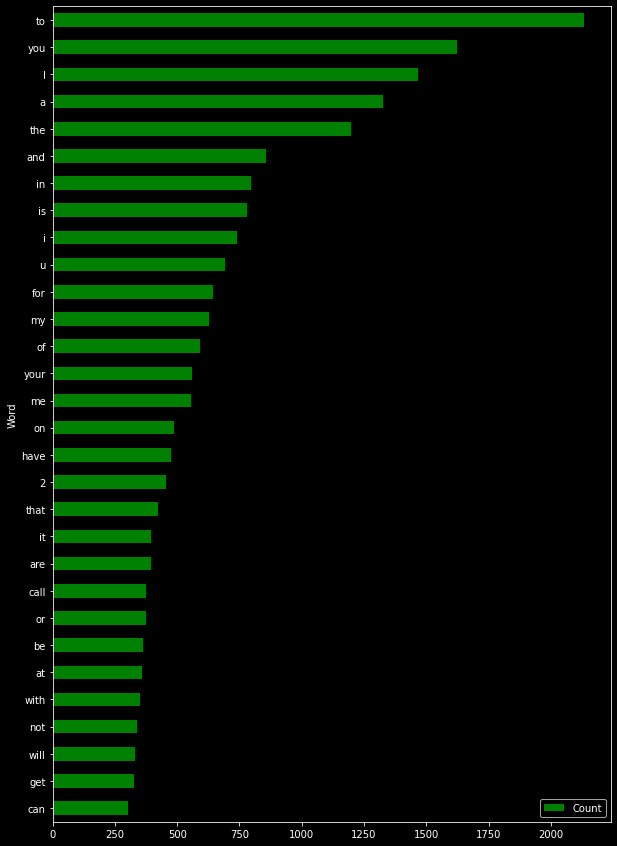

In [ ]:
def word_count_plot(data):
     # finding words along with count
     word_counter = collections.Counter([word for sentence in data for word in sentence.split()])
     most_count = word_counter.most_common(30) # 30 most common words
     # sorted data frame
     most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count")
     most_count.plot.barh(x = "Word", y = "Count", color="green", figsize=(10, 15))
word_count_plot(data["Tweet"])

In [ ]:
lem = WordNetLemmatizer()
def preprocessing(data):
      sms = contractions.fix(data) # converting shortened words to original (Eg:"I'm" to "I am")
      sms = sms.lower() # lower casing the sms
      sms = re.sub(r'https?://S+|www.S+', "", sms).strip() #removing url
      sms = re.sub("[^a-z ]", "", sms) # removing symbols and numbes
      sms = sms.split() #splitting
      # lemmatization and stopword removal
      sms = [lem.lemmatize(word) for word in sms if not word in set(stopwords.words("english"))]
      sms = " ".join(sms)
      return sms
x = data["Tweet"].apply(preprocessing)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
y = lb_enc.fit_transform(y)

# **Tokenization of Message**

---



In [ ]:
tokenizer = Tokenizer() #initializing the tokenizer
tokenizer.fit_on_texts(x)# fitting on the sms data
text_to_sequence = tokenizer.texts_to_sequences(x) # creating the numerical sequence

In [ ]:
 for i in range(5):
           print("Text               : ",x[i] )
           print("Numerical Sequence : ", text_to_sequence[i])

Text               :  go jurong point crazy available bugis n great world la e buffet cine got amore wat
Numerical Sequence :  [3, 3575, 255, 549, 522, 1028, 35, 56, 236, 845, 80, 2411, 1029, 9, 3576, 70]
Text               :  ok lar joking wif oni
Numerical Sequence :  [6, 220, 1173, 328, 1539]
Text               :  free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
Numerical Sequence :  [5, 342, 582, 724, 92, 1540, 846, 478, 1541, 147, 175, 17, 1540, 221, 342, 2412, 23, 2413, 263, 2414]
Text               :  dun say early hor c already say
Numerical Sequence :  [142, 48, 256, 2415, 69, 75, 48]
Text               :  nah think go usf life around though
Numerical Sequence :  [774, 33, 3, 725, 86, 121, 195]


In [ ]:
tokenizer.index_word # this will output a dictionary of index and words

{1: 'call',
 2: 'get',
 3: 'go',
 4: 'know',
 5: 'free',
 6: 'ok',
 7: 'ltgt',
 8: 'day',
 9: 'got',
 10: 'want',
 11: 'come',
 12: 'like',
 13: 'love',
 14: 'going',
 15: 'good',
 16: 'time',
 17: 'text',
 18: 'send',
 19: 'message',
 20: 'need',
 21: 'one',
 22: 'today',
 23: 'txt',
 24: 'home',
 25: 'lor',
 26: 'see',
 27: 'sorry',
 28: 'stop',
 29: 'r',
 30: 'still',
 31: 'back',
 32: 'mobile',
 33: 'think',
 34: 'reply',
 35: 'n',
 36: 'take',
 37: 'tell',
 38: 'phone',
 39: 'new',
 40: 'week',
 41: 'later',
 42: 'da',
 43: 'hi',
 44: 'please',
 45: 'cannot',
 46: 'make',
 47: 'tomorrow',
 48: 'say',
 49: 'night',
 50: 'claim',
 51: 'well',
 52: 'thing',
 53: 'much',
 54: 'dear',
 55: 'oh',
 56: 'great',
 57: 'hey',
 58: 'pls',
 59: 'would',
 60: 'give',
 61: 'number',
 62: 'way',
 63: 'happy',
 64: 'friend',
 65: 'work',
 66: 'hope',
 67: 'u',
 68: 'let',
 69: 'c',
 70: 'wat',
 71: 'prize',
 72: 'right',
 73: 'yes',
 74: 'min',
 75: 'already',
 76: 'ask',
 77: 'really',
 78: 'yea

In [ ]:
max_length_sequence = max([len(i) for i in text_to_sequence])
 # finding the length of largest sequence
X = pad_sequences(text_to_sequence, maxlen=max_length_sequence,
                                    padding = "pre")
X

array([[   0,    0,    0, ...,    9, 3576,   70],
       [   0,    0,    0, ..., 1173,  328, 1539],
       [   0,    0,    0, ..., 2413,  263, 2414],
       ...,
       [   0,    0,    0, ..., 1024, 7818, 3573],
       [   0,    0,    0, ...,  789,   67,    5],
       [   0,    0,    0, ..., 2147,  363,  145]], dtype=int32)

# **Training and Testing Split**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101, test_size= 0.2)

# Model **LSTM**

---



In [ ]:
TOT_SIZE = len(tokenizer.word_index)+1
def create_model():
      lstm_model = Sequential()
      lstm_model.add(Embedding(TOT_SIZE, 32, input_length=max_length_sequence)) #convert each word into a fixed length vector of defined size
      lstm_model.add(LSTM(100))
      lstm_model.add(Dropout(0.4))#to avoid overfitting #reduce the number of neurons
      lstm_model.add(Dense(20, activation="relu"))#to introduce non-linearity into the output of a neuron
      lstm_model.add(Dropout(0.3))
      lstm_model.add(Dense(1, activation = "sigmoid"))
      return lstm_model
lstm_model = create_model()
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 32)            250240    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 20)                2020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 305,481
Trainable params: 305,481
Non-trai

In [ ]:
lstm_model.fit(X_train, y_train, epochs = 5, validation_split=0.2, batch_size=16)

Epoch 1/5
223/223 [==============================] - 21s 78ms/step - loss: 0.2025 - accuracy: 0.9374 - val_loss: 0.0718 - val_accuracy: 0.9798
Epoch 2/5
223/223 [==============================] - 30s 133ms/step - loss: 0.0393 - accuracy: 0.9899 - val_loss: 0.0998 - val_accuracy: 0.9753
Epoch 3/5
223/223 [==============================] - 18s 79ms/step - loss: 0.0219 - accuracy: 0.9952 - val_loss: 0.1019 - val_accuracy: 0.9776
Epoch 4/5
223/223 [==============================] - 16s 73ms/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.1240 - val_accuracy: 0.9742
Epoch 5/5
223/223 [==============================] - 18s 80ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.1436 - val_accuracy: 0.9776


In [ ]:
test_acc=lstm_model.evaluate(X_test,y_test)

35/35 [==============================] - 1s 26ms/step - loss: 0.0986 - accuracy: 0.9803


In [ ]:
print('accuracy for LSTM model is %.03f'%(test_acc[1]*100))

accuracy for LSTM model is 98.027


# **Model Bidirectional LSTM**

---



In [ ]:
TOT_SIZE = len(tokenizer.word_index)+1
def create_model():

      bidirectional_lstm_model = Sequential()
      bidirectional_lstm_model.add(Embedding(TOT_SIZE, 32, input_length=max_length_sequence))
      bidirectional_lstm_model.add(Bidirectional(LSTM(64)))
      bidirectional_lstm_model.add(Dropout(0.4))
      bidirectional_lstm_model.add(Dense(20, activation="relu")) #to introduce non-linearity into the output of a neuron.
      bidirectional_lstm_model.add(Dropout(0.3))
      bidirectional_lstm_model.add(Dense(1, activation = "sigmoid"))
      return bidirectional_lstm_model
bidirectional_lstm_model = create_model()
bidirectional_lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
bidirectional_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 79, 32)            250240    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                2580      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                      

In [ ]:
bidirectional_lstm_model.fit(X_train, y_train, epochs = 5, validation_split=0.2, batch_size=16)

Epoch 1/5
223/223 [==============================] - 30s 100ms/step - loss: 0.2263 - accuracy: 0.9273 - val_loss: 0.0668 - val_accuracy: 0.9809
Epoch 2/5
223/223 [==============================] - 20s 87ms/step - loss: 0.0379 - accuracy: 0.9905 - val_loss: 0.0765 - val_accuracy: 0.9787
Epoch 3/5
223/223 [==============================] - 21s 92ms/step - loss: 0.0155 - accuracy: 0.9969 - val_loss: 0.1070 - val_accuracy: 0.9843
Epoch 4/5
223/223 [==============================] - 19s 84ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.1048 - val_accuracy: 0.9776
Epoch 5/5
223/223 [==============================] - 21s 94ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.1160 - val_accuracy: 0.9809


In [ ]:
test_acc_bidirectional_lstm_model=bidirectional_lstm_model.evaluate(X_test,y_test)

35/35 [==============================] - 1s 22ms/step - loss: 0.1103 - accuracy: 0.9812


In [ ]:
print('accuracy for bidirectional lstm model is %.03f'%(test_acc_bidirectional_lstm_model[1]*100))

accuracy for bidirectional lstm model is 98.117


# **Model Dense Text Classifier**

In [ ]:
vocab_size = 500 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 21
max_len = 50
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
vocab_size = 500

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))#convert to vectors
model.add(GlobalAveragePooling1D())#average pooling is done in order to smooth the flow of neurons and avoid overfitting
model.add(Dense(24, activation='relu'))#to introduce non-linearity into the output of a neuron
model.add(Dropout(drop_value))#how many neurons should be dropped to avoid overfiting
model.add(Dense(1, activation='sigmoid'))#regular deeply connects neural network layer
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dropout_4 (Dropout)         (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(x)
training_sequences = tokenizer.texts_to_sequences(x)

In [ ]:
print(training_sequences[0])

[4, 1, 256, 1, 1, 1, 36, 57, 237, 1, 81, 1, 1, 10, 1, 71]


In [ ]:
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )

In [ ]:
print(training_padded[0])

[  4   1 256   1   1   1  36  57 237   1  81   1   1  10   1  71   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [ ]:
len(training_padded[0]), len(training_padded[1])

(50, 50)

# **test and train split**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(training_padded,y,random_state=101, test_size= 0.2)

# **Model**
---



In [ ]:
num_epochs = 25

model.fit(X_train, y_train, epochs=num_epochs, validation_split=0.2, verbose=2)


Epoch 1/25
112/112 - 2s - loss: 0.5251 - accuracy: 0.8662 - val_loss: 0.3986 - val_accuracy: 0.8520 - 2s/epoch - 14ms/step
Epoch 2/25
112/112 - 0s - loss: 0.3637 - accuracy: 0.8662 - val_loss: 0.3694 - val_accuracy: 0.8520 - 363ms/epoch - 3ms/step
Epoch 3/25
112/112 - 0s - loss: 0.3336 - accuracy: 0.8662 - val_loss: 0.3397 - val_accuracy: 0.8520 - 334ms/epoch - 3ms/step
Epoch 4/25
112/112 - 0s - loss: 0.2977 - accuracy: 0.8662 - val_loss: 0.2880 - val_accuracy: 0.8520 - 323ms/epoch - 3ms/step
Epoch 5/25
112/112 - 0s - loss: 0.2408 - accuracy: 0.8808 - val_loss: 0.2352 - val_accuracy: 0.9025 - 336ms/epoch - 3ms/step
Epoch 6/25
112/112 - 0s - loss: 0.1919 - accuracy: 0.9251 - val_loss: 0.1841 - val_accuracy: 0.9283 - 317ms/epoch - 3ms/step
Epoch 7/25
112/112 - 0s - loss: 0.1468 - accuracy: 0.9548 - val_loss: 0.1508 - val_accuracy: 0.9406 - 295ms/epoch - 3ms/step
Epoch 8/25
112/112 - 0s - loss: 0.1117 - accuracy: 0.9658 - val_loss: 0.1236 - val_accuracy: 0.9496 - 332ms/epoch - 3ms/step
Ep

In [ ]:
test_acc=model.evaluate(X_test,y_test)

35/35 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.9821


In [ ]:
print('accuracy for DenseTextClassifier model is %.02f'%(test_acc[1]*100))

accuracy for DenseTextClassifier model is 98.21
